In [1]:
import os
import ast
import re
import pandas as pd
import numpy as np

    


In [2]:

runs_path = "Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/SHINE_Experience_2"


def get_hyperparams_str(params):
    d = params.split("_")[1:-1]
    D = {}
    for k,it in zip(d[0::2],d[1::2]):
        D[k] = it
    return D

def process_runs(path):
    dirs = os.listdir(path)
    records = []
    current_gen = 0
    for i in dirs:
        generation = None
        if(not os.path.isdir(path+"/"+i)):
            print(path+"/"+i + " is not a dir -> ignored")
            continue
        with open(path+"/"+i+"/info.log","r") as file:
            for line in file.readlines():
                if("#" in line):
                    generation = int(re.findall(r"Generation (\d+)",line)[0])
                else:    
                    d = (ast.literal_eval(line))
                    d.update(get_hyperparams_str(i))
                    pos = d["robot_pos"]
                    del d["robot_pos"]
                    d_items = sorted(d.items(),key=lambda x:x[0])
                    d_items = [i[1] for i in d_items]
                    t = (path.split("/")[-1], generation, *d_items, *pos)
                    records.append(t)
    df = pd.DataFrame.from_records(records, columns=["Execution","Generation"]+sorted(d.keys())+["pos_x","pos_y","angle"])
    return df

df = process_runs(runs_path)
df

Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/SHINE_Experience_2/summary_experience.txt is not a dir -> ignored


,Execution,Generation,alpha,beta,collision,dist_obj,exit_reached,pos_x,pos_y,angle
0,SHINE_Experience_2,0,7,50,10,-350.153352,0.0,17.573605,407.573547,0.785398
1,SHINE_Experience_2,0,7,50,0,-441.386835,0.0,82.090225,500.833710,-0.524036
2,SHINE_Experience_2,0,7,50,10,-520.412825,0.0,113.809364,577.623474,1.985398
3,SHINE_Experience_2,0,7,50,0,-390.000000,0.0,60.000000,450.000000,-1.897787
4,SHINE_Experience_2,0,7,50,10,-350.153352,0.0,17.573605,407.573547,0.785398
...,...,...,...,...,...,...,...,...,...,...
160795,SHINE_Experience_2,100,9,30,0,-443.841379,0.0,110.911736,500.911743,0.785398
160796,SHINE_Experience_2,100,9,30,0,-352.702479,0.0,398.916992,157.643799,-0.061171
160797,SHINE_Experience_2,100,9,30,886,-285.844635,0.0,295.872833,221.465668,-2.417439
160798,SHINE_Experience_2,100,9,30,10,-520.495000,0.0,111.947983,577.896179,1.644426


In [3]:
runs_path = "Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/SHINE_1"
shine_results = process_runs(runs_path)
shine_results

KeyboardInterrupt: 

In [80]:
def get_distance_evolution_by_time_shine(df):
    return df.groupby(["alpha","beta","Generation"]).max().reset_index()

def get_distance_evolution_by_time(df):
    return df.groupby(["Generation"]).max().reset_index()

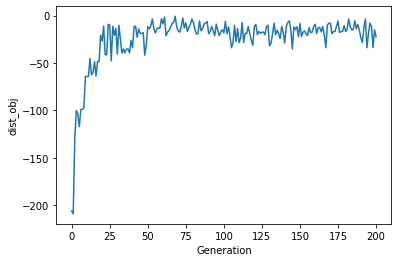

In [81]:
import seaborn as sns
shine_2 = get_distance_evolution_by_time_shine(shine_results)
sns.lineplot(x="Generation", y="dist_obj",data=shine_2)

In [66]:
shine_2

,alpha,beta,Generation,Execution,collision,dist_obj,exit_reached,pos_x,pos_y,angle
0,7,30,0,SHINE_1,236,-206.353970,0.0,344.644470,580.499756,3.068583
1,7,30,1,SHINE_1,84,-209.323764,0.0,579.424316,580.465820,3.068583
2,7,30,2,SHINE_1,883,-131.370739,0.0,579.818115,580.465820,3.134130
3,7,30,3,SHINE_1,982,-100.144581,0.0,579.424316,580.471985,3.137923
4,7,30,4,SHINE_1,981,-103.629724,0.0,579.818115,580.493103,3.141262
...,...,...,...,...,...,...,...,...,...,...
196,7,30,196,SHINE_1,962,-7.850309,1.0,580.499939,580.490479,3.133718
197,7,30,197,SHINE_1,914,-11.501517,0.0,580.498474,580.497131,3.130314
198,7,30,198,SHINE_1,908,-33.750440,0.0,580.495056,580.490906,3.138165
199,7,30,199,SHINE_1,914,-15.000943,0.0,580.498840,580.490967,3.138071


In [ ]:
def filter_paths(filter):
    L = os.listdir("Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/")
    return ["Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/"+i for i in L if filter in i]

def concat_dfs(paths):
    L = [process_runs(p) for p in paths]
    return pd.concat(L)

In [90]:
p = filter_paths("MAPElites")
map_elites_comp = concat_dfs(p)

Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_3/summary_experience.txt is not a dir -> ignored
Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_2/summary_experience.txt is not a dir -> ignored
Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_1/summary_experience.txt is not a dir -> ignored


In [76]:
runs_path = "Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_2"
shine_results = process_runs(runs_path)

Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_2/summary_experience.txt is not a dir -> ignored


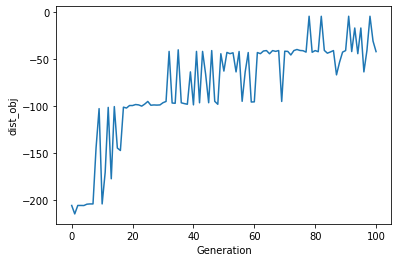

In [75]:
shine_2 = get_distance_evolution_by_time(shine_results)
sns.lineplot(x="Generation", y="dist_obj",data=shine_2)

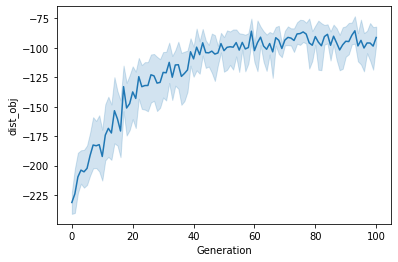

In [107]:
df = map_elites_comp.groupby(["Generation","dim"]).max().reset_index()
sns.lineplot(x="Generation", y="dist_obj",data=df)

In [105]:
map_elites_comp.groupby(["Generation","dim"]).max().reset_index()

,Generation,dim,Execution,collision,dist_obj,exit_reached,pos_x,pos_y,angle
0,0,105,MAPElites_Experience_3,10,-242.724474,0.0,333.090454,580.469421,2.785398
1,0,115,MAPElites_Experience_3,10,-222.576692,0.0,325.943909,580.107788,2.785398
2,0,125,MAPElites_Experience_3,18,-258.021298,0.0,344.644470,580.465820,3.118138
3,0,135,MAPElites_Experience_3,10,-258.021298,0.0,579.348022,580.465820,3.068583
4,0,145,MAPElites_Experience_3,64,-234.923307,0.0,278.439301,580.107788,3.068583
...,...,...,...,...,...,...,...,...,...
1510,100,55,MAPElites_Experience_3,914,-102.563509,0.0,580.491028,580.340149,3.106802
1511,100,65,MAPElites_Experience_3,954,-97.305197,0.0,580.468323,580.499451,3.135601
1512,100,75,MAPElites_Experience_3,906,-100.016988,0.0,580.157410,580.461609,3.141228
1513,100,85,MAPElites_Experience_3,949,-95.720567,0.0,580.405518,580.492554,3.078498


In [112]:
df[df["Generation"] == 100] 

,Generation,dim,Execution,collision,dist_obj,exit_reached,pos_x,pos_y,angle
1500,100,105,MAPElites_Experience_3,688,-97.895609,0.0,479.788635,580.494202,3.139907
1501,100,115,MAPElites_Experience_3,816,-95.039865,0.0,580.414551,580.410461,3.106864
1502,100,125,MAPElites_Experience_3,936,-94.626199,0.0,336.746399,580.484192,3.045067
1503,100,135,MAPElites_Experience_3,889,-95.154782,0.0,580.424255,580.429626,3.135779
1504,100,145,MAPElites_Experience_3,407,-65.275218,0.0,580.235657,580.464294,2.785398
1505,100,15,MAPElites_Experience_3,948,-95.043420,0.0,580.467285,580.308960,3.121206
1506,100,25,MAPElites_Experience_3,949,-42.095759,0.0,580.303772,580.497192,3.136499
1507,100,35,MAPElites_Experience_3,963,-99.418998,0.0,580.346313,580.497803,3.112143
1508,100,45,MAPElites_Experience_3,935,-95.118375,0.0,580.411438,580.445618,3.132431
1509,100,5,MAPElites_Experience_3,887,-96.896498,0.0,579.457520,580.443054,2.955963


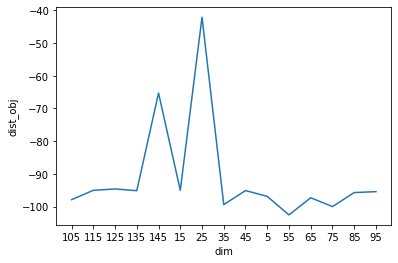

In [113]:
df = map_elites_comp.groupby(["Generation","dim"]).max().reset_index()
sns.lineplot(x="dim", y="dist_obj",data=df[df["Generation"] == 100] )

In [141]:
L = filter_paths("NS")
L = L + filter_paths("SHINE_1")
L = L + filter_paths("MAPElites_Experience_5")

In [142]:
df = concat_dfs(L).dropna(axis=1)

Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/NS_2/summary_experience.txt is not a dir -> ignored
Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/SHINE_1/summary_experience.txt is not a dir -> ignored
Bureau/Illuminated_Evolution/SHINE_LIB/Experiences/MAPElites_Experience_5/summary_experience.txt is not a dir -> ignored


In [143]:
df

,Execution,Generation,collision,dist_obj,exit_reached,pos_x,pos_y,angle
0,NS_2,0,10,-526.339852,0.0,141.323532,580.019348,1.585398
1,NS_2,0,10,-378.456522,0.0,157.272308,425.742310,0.284102
2,NS_2,0,10,-536.134446,0.0,190.107773,580.107788,0.785398
3,NS_2,0,10,-536.134446,0.0,190.107773,580.107788,0.785398
4,NS_2,0,0,-390.000000,0.0,60.000000,450.000000,-2.014602
...,...,...,...,...,...,...,...,...
400995,MAPElites_Experience_5,200,0,-476.476186,0.0,360.923737,429.424500,0.137479
400996,MAPElites_Experience_5,200,10,-479.481962,0.0,366.249634,428.936462,0.089763
400997,MAPElites_Experience_5,200,10,-715.842504,0.0,578.972717,553.049500,0.901954
400998,MAPElites_Experience_5,200,0,-395.338329,0.0,267.687286,396.390228,-1.614602


In [146]:
df_means = df.groupby(["Generation","Execution"]).max().reset_index()[["Generation", "dist_obj", "Execution"]]
df_means

,Generation,dist_obj,Execution
0,0,-102.659392,MAPElites_Experience_5
1,0,-211.344721,NS_2
2,0,-206.353970,SHINE_1
3,1,-222.363475,MAPElites_Experience_5
4,1,-206.478342,NS_2
...,...,...,...
598,199,-13.373426,NS_2
599,199,-15.000943,SHINE_1
600,200,-42.155943,MAPElites_Experience_5
601,200,-2.652681,NS_2


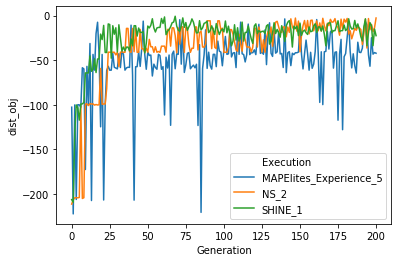

In [147]:
sns.lineplot(x="Generation", y="dist_obj",hue="Execution", data=df_means)